In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
education_df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [3]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]
states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

education_df.dropna(inplace=True)
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


1) Derive the descriptive statistics of the data and discuss the points you find remarkable.


In [10]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


2) Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

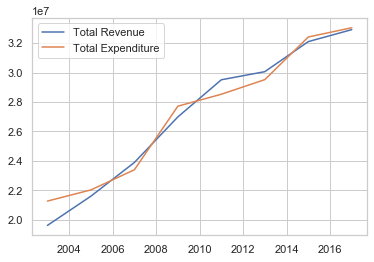

In [12]:
plt.plot(education_df.loc[education_df.STATE == 'ILLINOIS', 'YEAR'], 
        education_df.loc[education_df.STATE == 'ILLINOIS', 'TOTAL_REVENUE'], label = 'Total Revenue')
plt.plot(education_df.loc[education_df.STATE == 'ILLINOIS', 'YEAR'], 
        education_df.loc[education_df.STATE == 'ILLINOIS', 'TOTAL_EXPENDITURE'], label = 'Total Expenditure')
plt.legend()
plt.show()

3) In your chosen state, which of the lessons are the students more successful, math or reading?


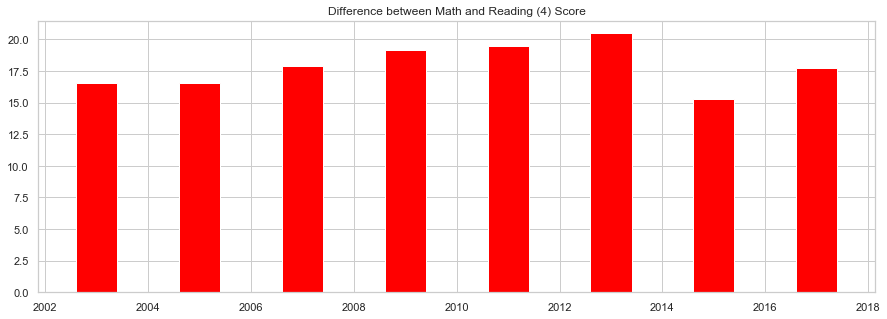

In [21]:
plt.figure(figsize=(15,5))
plt.bar(education_df.loc[education_df.STATE == 'ILLINOIS', 'YEAR'],
        education_df.loc[education_df.STATE == 'ILLINOIS', 'AVG_MATH_4_SCORE'] -
         education_df.loc[education_df.STATE == 'ILLINOIS', 'AVG_READING_4_SCORE'], 
        color=["red"])
plt.title('Difference between Math and Reading (4) Score')
plt.show()


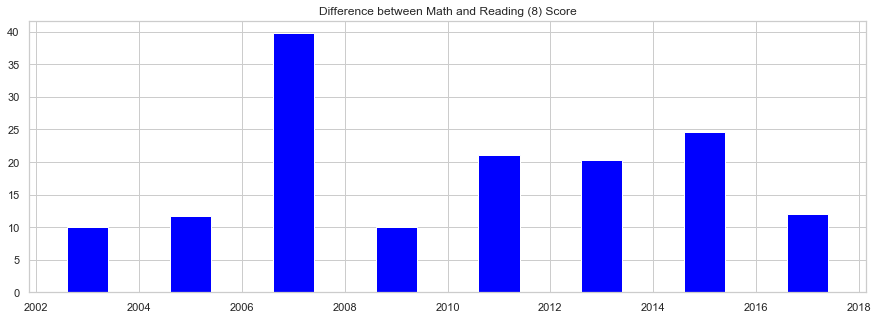

In [4]:
plt.figure(figsize=(15,5))
plt.bar(education_df.loc[education_df.STATE == 'ILLINOIS', 'YEAR'],
        education_df.loc[education_df.STATE == 'ILLINOIS', 'AVG_MATH_8_SCORE'] -
         education_df.loc[education_df.STATE == 'ILLINOIS', 'AVG_READING_8_SCORE'], 
        color=["blue"])
plt.title('Difference between Math and Reading (8) Score')
plt.show()

In Illinois the students are more successful in Math than they are in Reading.

4) What are the distributions of the math and reading scores in the sample?


(array([  2.,   0.,   1.,   5.,  19.,  22.,  79., 144., 163.,  31.]),
 array([187.13466996, 193.76329908, 200.39192819, 207.02055731,
        213.64918643, 220.27781555, 226.90644466, 233.53507378,
        240.1637029 , 246.79233202, 253.42096113]),
 <a list of 10 Patch objects>)

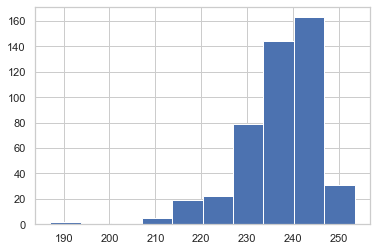

In [5]:
plt.hist(education_df['AVG_MATH_4_SCORE'].dropna())

(array([  2.,   2.,   2.,   5.,  33.,  56., 100., 173.,  76.,  17.]),
 array([232.83150953, 239.60518208, 246.37885463, 253.15252718,
        259.92619972, 266.69987227, 273.47354482, 280.24721737,
        287.02088992, 293.79456246, 300.56823501]),
 <a list of 10 Patch objects>)

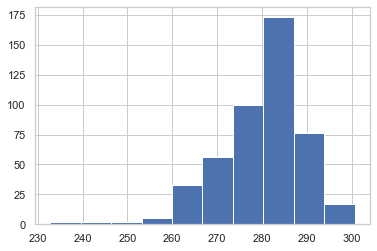

In [6]:
plt.hist(education_df['AVG_MATH_8_SCORE'].dropna())

(array([  1.,   3.,   1.,   6.,  40.,  52., 110., 176.,  64.,  13.]),
 array([181.62699047, 187.14167808, 192.65636569, 198.1710533 ,
        203.68574091, 209.20042853, 214.71511614, 220.22980375,
        225.74449136, 231.25917897, 236.77386658]),
 <a list of 10 Patch objects>)

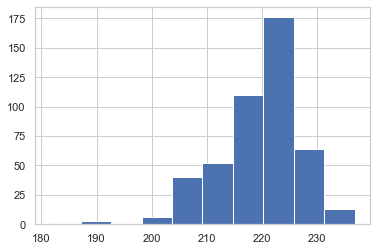

In [7]:
plt.hist(education_df['AVG_READING_4_SCORE'].dropna())

(array([  4.,   3.,   4.,  35.,  52.,  79., 126., 121.,  36.,   6.]),
 array([236.37910176, 240.79110458, 245.2031074 , 249.61511022,
        254.02711304, 258.43911586, 262.85111868, 267.2631215 ,
        271.67512432, 276.08712715, 280.49912997]),
 <a list of 10 Patch objects>)

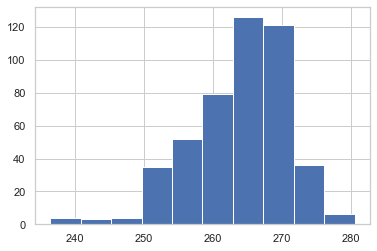

In [8]:
plt.hist(education_df['AVG_READING_8_SCORE'].dropna())

5) Now look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.


In [15]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
education_df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

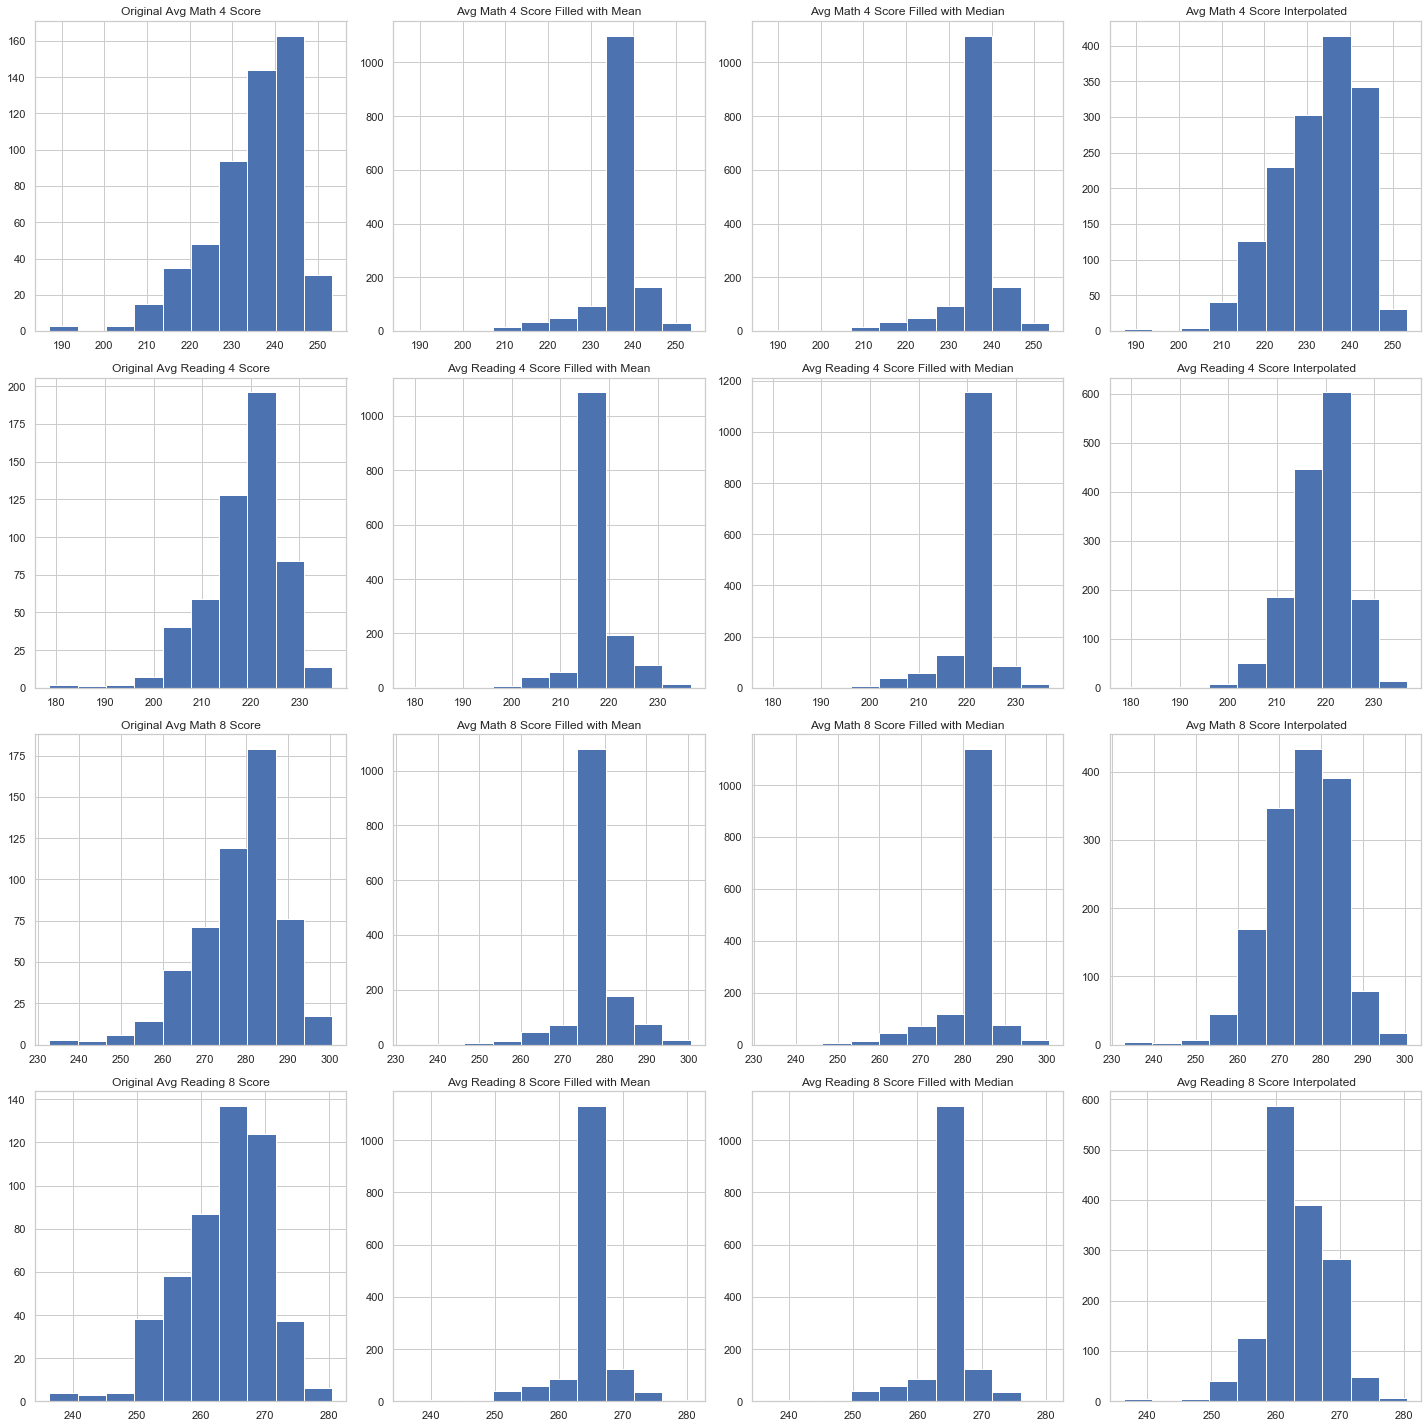

In [18]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title('Original Avg Math 4 Score')

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title('Avg Math 4 Score Filled with Mean')

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title('Avg Math 4 Score Filled with Median')

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title('Avg Math 4 Score Interpolated')

plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title('Original Avg Reading 4 Score')

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title('Avg Reading 4 Score Filled with Mean')

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title('Avg Reading 4 Score Filled with Median')

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title('Avg Reading 4 Score Interpolated')

plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title('Original Avg Math 8 Score')

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title('Avg Math 8 Score Filled with Mean')

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title('Avg Math 8 Score Filled with Median')

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title('Avg Math 8 Score Interpolated')

plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title('Original Avg Reading 8 Score')

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title('Avg Reading 8 Score Filled with Mean')

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title('Avg Reading 8 Score Filled with Median')

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate())
plt.title('Avg Reading 8 Score Interpolated')

plt.tight_layout()
plt.show()